**Classifying, if an image contains a specific image**
* An object of either pizza or steak

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

# Get the file paths lk('pizza_steak'):
for dirnames,  filenames, dirpath in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} image(s) in {dirpath}. ")


There are 11 directories and 2 image(s) in []. 
There are 16 directories and 2 image(s) in []. 
There are 22 directories and 0 image(s) in ['1001116.jpg', '1032754.jpg', '103708.jpg', '1060407.jpg', '106507.jpg', '1067986.jpg', '1106738.jpg', '1119571.jpg', '11297.jpg', '1152100.jpg', '1179703.jpg', '1180001.jpg', '1180273.jpg', '1183595.jpg', '1202689.jpg', '121960.jpg', '1220156.jpg', '1223284.jpg', '1226346.jpg', '1228171.jpg', '124815.jpg', '1265335.jpg', '1275885.jpg', '1280320.jpg', '129666.jpg', '1315645.jpg', '1342321.jpg', '1380247.jpg', '138961.jpg', '1398213.jpg', '139952.jpg', '139987.jpg', '140016.jpg', '1412011.jpg', '1445608.jpg', '144631.jpg', '1459760.jpg', '1475479.jpg', '1484836.jpg', '148765.jpg', '1503858.jpg', '1506213.jpg', '1507019.jpg', '1512557.jpg', '153195.jpg', '1555015.jpg', '1594097.jpg', '1618659.jpg', '1636919.jpg', '1655630.jpg', '1686938.jpg', '1687143.jpg', '1691503.jpg', '1694874.jpg', '1765727.jpg', '177513.jpg', '1843754.jpg', '1895182.jpg', '1925

In [4]:
num_pizza_train = len(os.listdir('pizza_steak/train/pizza'))
num_steak_train = len(os.listdir('pizza_steak/train/steak'))

num_pizza_train, num_steak_train

(750, 750)

In [5]:
import pathlib

dir_names = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in dir_names.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [6]:
# visualize the images
import matplotlib.image as mpimg
import random

In [7]:
def view_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # picking a random image path
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)

    # read_image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"image shape:{img.shape}")
    return img

['3441394.jpg']
image shape:(512, 512, 3)


array([[[234, 233, 231],
        [233, 232, 230],
        [231, 230, 228],
        ...,
        [236, 239, 244],
        [237, 241, 244],
        [234, 238, 241]],

       [[234, 233, 231],
        [233, 232, 230],
        [231, 230, 228],
        ...,
        [235, 238, 243],
        [235, 239, 242],
        [233, 237, 240]],

       [[233, 232, 230],
        [232, 231, 229],
        [232, 231, 229],
        ...,
        [236, 237, 241],
        [236, 237, 241],
        [234, 235, 239]],

       ...,

       [[ 59,  58,  64],
        [ 53,  52,  58],
        [ 52,  51,  57],
        ...,
        [228, 233, 239],
        [227, 232, 238],
        [226, 231, 237]],

       [[ 63,  62,  68],
        [ 53,  52,  58],
        [ 50,  49,  55],
        ...,
        [228, 233, 237],
        [229, 234, 238],
        [227, 232, 236]],

       [[ 68,  67,  73],
        [ 55,  54,  60],
        [ 51,  50,  56],
        ...,
        [228, 233, 237],
        [231, 236, 240],
        [227, 232, 236]]

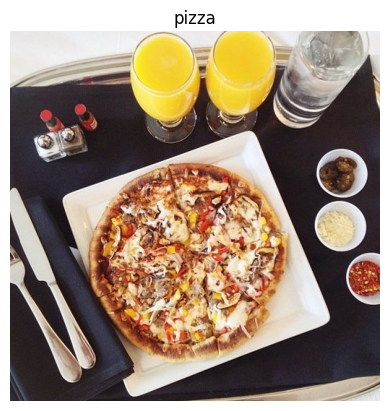

In [8]:
img = view_image("pizza_steak/train/", "pizza")
img

* Going to perform Feature Scaling and
  * load the image
  * preprocess the image 
* Build a cnn architecture for the data
  * define the model
  * compile it
  * fit the model   

In [9]:
# load the data
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
tf.random.set_seed(42)

train_gen = ImageDataGenerator(rescale=1./225)
test_gen = ImageDataGenerator(rescale=1./225)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_gen.flow_from_directory(directory = train_dir,
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'binary',
                                           seed = 42
                                         )

test_data = train_gen.flow_from_directory(directory = test_dir,
                                          target_size =  (224,224),
                                          batch_size = 32,
                                          class_mode = 'binary',
                                          seed = 42
                                        )



model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, padding='valid'))

model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# compile the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)


# fit the model
model.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 15,
          validation_data = test_data)
          # validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 447ms/step - accuracy: 0.7021 - loss: 0.5942 - val_accuracy: 0.8440 - val_loss: 0.3718
Epoch 2/15


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8440 - val_loss: 0.3718
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.8050 - loss: 0.4395 - val_accuracy: 0.8560 - val_loss: 0.3505
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8560 - val_loss: 0.3505
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 456ms/step - accuracy: 0.8300 - loss: 0.4025 - val_accuracy: 0.8260 - val_loss: 0.3777
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8260 - val_loss: 0.3777
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 521ms/step - accuracy: 0.8460 - loss: 0.3756 - val_accuracy: 0.8520 - val_loss: 0.3260
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8520 - val_loss: 0.3260
Epoch 9/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 512ms/step - accuracy: 0.8740 - loss: 0.29

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [10]:
train_data[0]

(array([[[[0.52444446, 0.5466667 , 0.30666667],
          [0.5466667 , 0.5644445 , 0.3377778 ],
          [0.50666666, 0.51555556, 0.29333335],
          ...,
          [0.09777778, 0.20888889, 0.22666667],
          [0.11555555, 0.23111111, 0.23555556],
          [0.11555555, 0.23111111, 0.21777779]],
 
         [[0.3288889 , 0.36      , 0.12888889],
          [0.36888888, 0.3866667 , 0.16      ],
          [0.4888889 , 0.4888889 , 0.26666668],
          ...,
          [0.14666668, 0.24000001, 0.25333333],
          [0.12888889, 0.22222222, 0.22666667],
          [0.12444445, 0.23555556, 0.21777779]],
 
         [[0.76      , 0.7911111 , 0.5511111 ],
          [0.5866667 , 0.6088889 , 0.36      ],
          [0.60444444, 0.6088889 , 0.35555556],
          ...,
          [0.1688889 , 0.24000001, 0.23555556],
          [0.14222223, 0.22666667, 0.21777779],
          [0.14666668, 0.23111111, 0.20444445]],
 
         ...,
 
         [[0.6844445 , 0.73777777, 0.51555556],
          [0.68444

In [11]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

model_2.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 5,
          validation_data = test_data,
          )

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.4987 - loss: 1.5133 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [12]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [13]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

history = model_3.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 5,
          validation_data = test_data,
          )

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - accuracy: 0.5917 - loss: 4.4812 - val_accuracy: 0.7000 - val_loss: 1.7740
Epoch 2/5


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 1.7740
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.7152 - loss: 1.3178 - val_accuracy: 0.7040 - val_loss: 0.8548
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7040 - val_loss: 0.8548
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 315ms/step - accuracy: 0.7303 - loss: 0.8647 - val_accuracy: 0.6400 - val_loss: 1.9720


In [14]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Let's visualize the data again

['1633289.jpg']
image shape:(384, 512, 3)
['3901703.jpg']
image shape:(512, 512, 3)


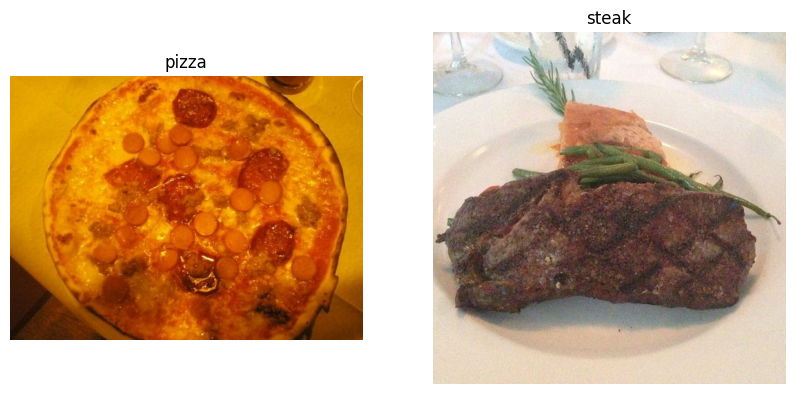

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
imag = view_image('pizza_steak/train/', 'pizza')
plt.subplot(1,2,2)
img = view_image('pizza_steak/test/', 'steak')
plt.show()

In [20]:
model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.8523 - loss: 0.3999


[0.43270182609558105, 0.8339999914169312]